# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [109]:
tab_sex = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
# tab_sex['media'] = tab_sex[1] / tab_sex['All']
tab_sex['perc_doente'] = tab_sex[1] / tab_sex['All']
tab_sex['odds_doente'] = tab_sex[1] / tab_sex[0]
tab_sex['odds_ratio'] = tab_sex['odds_doente'] / tab_sex.loc['All', 'odds_doente']
tab_sex['log_odds_ratio'] = np.log(tab_sex['odds_doente'])
tab_sex['WOE'] = np.log( (tab_sex[1] / tab_sex.loc['All', 1]) / (tab_sex[0] / tab_sex.loc['All', 0]) )
tab_sex

flag_doente,0,1,All,perc_doente,odds_doente,odds_ratio,log_odds_ratio,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [21]:
# df.age.value_counts().sort_index()[20:80].plot(kind='bar')

In [141]:
tab_age = pd.crosstab(pd.cut(df['age'], bins=[28, 39, 49, 59, 69, 79]), df['flag_doente'], margins=True)
# tab_age['media'] = tab_age[1] / tab_age['All']
tab_age['perc_doente'] = tab_age[1] / tab_age['All']
tab_age['odds_doente'] = tab_age[1] / tab_age[0]
tab_age['odds_ratio'] = tab_age['odds_doente'] / tab_age.loc['All', 'odds_doente']
tab_age['log_odds_ratio'] = np.log(tab_age['odds_doente'])
tab_age['WOE'] = np.log( (tab_age[1] / tab_age.loc['All', 1]) / (tab_age[0] / tab_age.loc['All', 0]) )

'''
Criando uma lista para armazenar as médias das idades em cada faixa etária pois usar o metodo diretamente na tabela causa erro por conta do índice 'All'

```tab_age['media_idade'] = df.groupby(pd.cut(df['age'], bins=[28, 39, 49, 59, 69, 79]))['age'].mean().values```

o codigo abaixo gera o mesmo resultado que o código comentado:
'''

media_idades = list(df['age'].groupby(pd.cut(df['age'], bins=[28, 39, 49, 59, 69, 79]), observed=False).mean())
media_idades.append(float(df['age'].mean()))

tab_age['media_idade_por_categoria'] = media_idades
tab_age

flag_doente,0,1,All,perc_doente,odds_doente,odds_ratio,log_odds_ratio,WOE,media_idade_por_categoria
age,,,,,,,,,
"(28, 39]",11,4,15,0.266667,0.363636,0.429039,-1.011601,-0.846208,36.200000
"(39, 49]",50,22,72,0.305556,0.440000,0.519137,-0.820981,-0.655588,44.333333
"(49, 59]",65,60,125,0.480000,0.923077,1.089098,-0.080043,0.085350,55.032000
"(59, 69]",32,49,81,0.604938,1.531250,1.806655,0.426084,0.591477,63.716049
"(69, 79]",6,4,10,0.400000,0.666667,0.786571,-0.405465,-0.240073,72.000000
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,54.438944


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

Observando os dados do percentual de doentes aparenta ter alguma correlação com com a idade como observado nos graficos abaixo.
Porém, a baixa quantidade de dados em algumas categorias de idade aparenta trazer pouca credibilidade nessas observações, tornando essas observações pouco confiaveis, pelo menos a princípio.

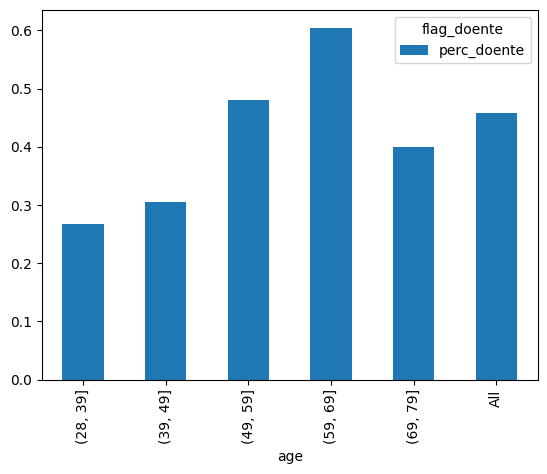

In [157]:
tab_age[['perc_doente']].plot(kind='bar')
plt.show()
plt.close()

Na reta abaixo ainda fica visivel uma aparente correlação entre idade e percentual de doentes, porém não podemos confiar nesses dados pois as duas categorias das extremidades possuem poucos dados para analisar-mos.

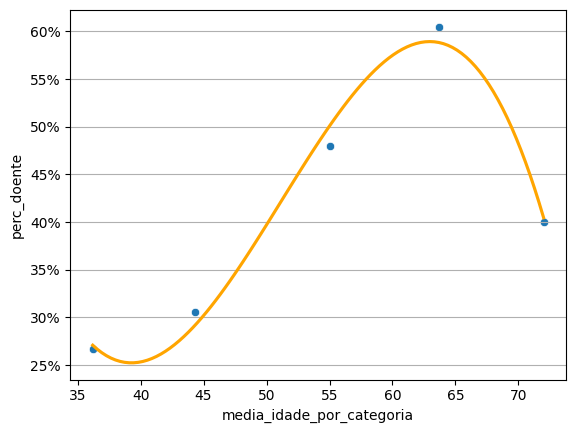

In [201]:
ax = sns.scatterplot(x='media_idade_por_categoria', y='perc_doente', data=tab_age[:5].reset_index())
ax.set_xlabel('Média da Idade por Categoria')
ax.set_ylabel('Percentual de Doentes')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.yaxis.set_ticks(np.arange(.25, .65, .05))
ax.yaxis.grid(True)
sns.regplot(x='media_idade_por_categoria', y='perc_doente', data=tab_age[:5].reset_index(), scatter=False, ax=ax, color='orange', order=3, ci=None)
plt.show()
plt.close()

Fica um pouco mais confiável observar a correlação utilizando e removendo as categorias de idade com poucos dados, mas ainda sim, esse caminho é um caminho perigoso, existem melhores maneiras de tratar e avaliar essa correlação entre a idade e o percentual de doentes.
Mas deixo abaixo um scatterplot com uma reta de regressão de ordem 1 e como ela aparenta ser coerente, mas como dito, esse caminho é perigoso (Chega a ser engraçado traçar uma reta com apenas 3 pontos).

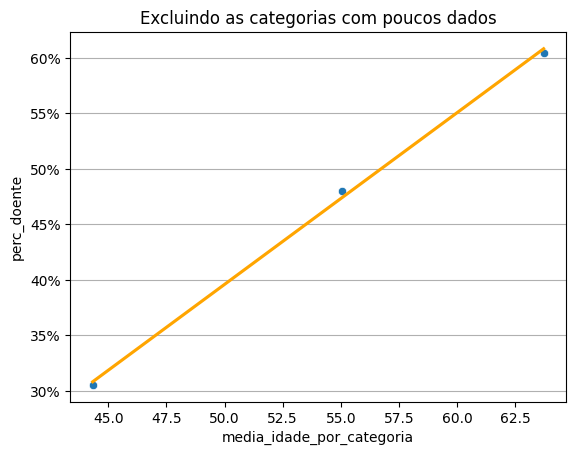

In [ ]:
ax = sns.scatterplot(x='media_idade_por_categoria', y='perc_doente', data=tab_age[1:4].reset_index())
ax.set_xlabel('Média da Idade por Categoria')
ax.set_ylabel('Percentual de Doentes')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.yaxis.set_ticks(np.arange(.25, .65, .05))
ax.yaxis.grid(True)
ax.set_title('Excluindo as categorias com poucos dados')
sns.regplot(x='media_idade_por_categoria', y='perc_doente', data=tab_age[1:4].reset_index(), scatter=False, ax=ax, color='orange', order=1, ci=None)
plt.show()
plt.close()

Isso conclui a atividade 1 do mod 18!